In [1]:
import missingno
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

In [5]:
dataset = Path('../data/raw/clicks.csv.gzip')
clicks  = (pd.read_csv(dataset, compression='gzip', parse_dates=['created'])
              .assign(created = lambda df: (df.created.dt.floor('h')
                                                      .dt.tz_convert('America/Montevideo')),
                      weekend = lambda df: df.created.dt.weekday.map(lambda wd: 1 if wd in [5,6] else 0)))

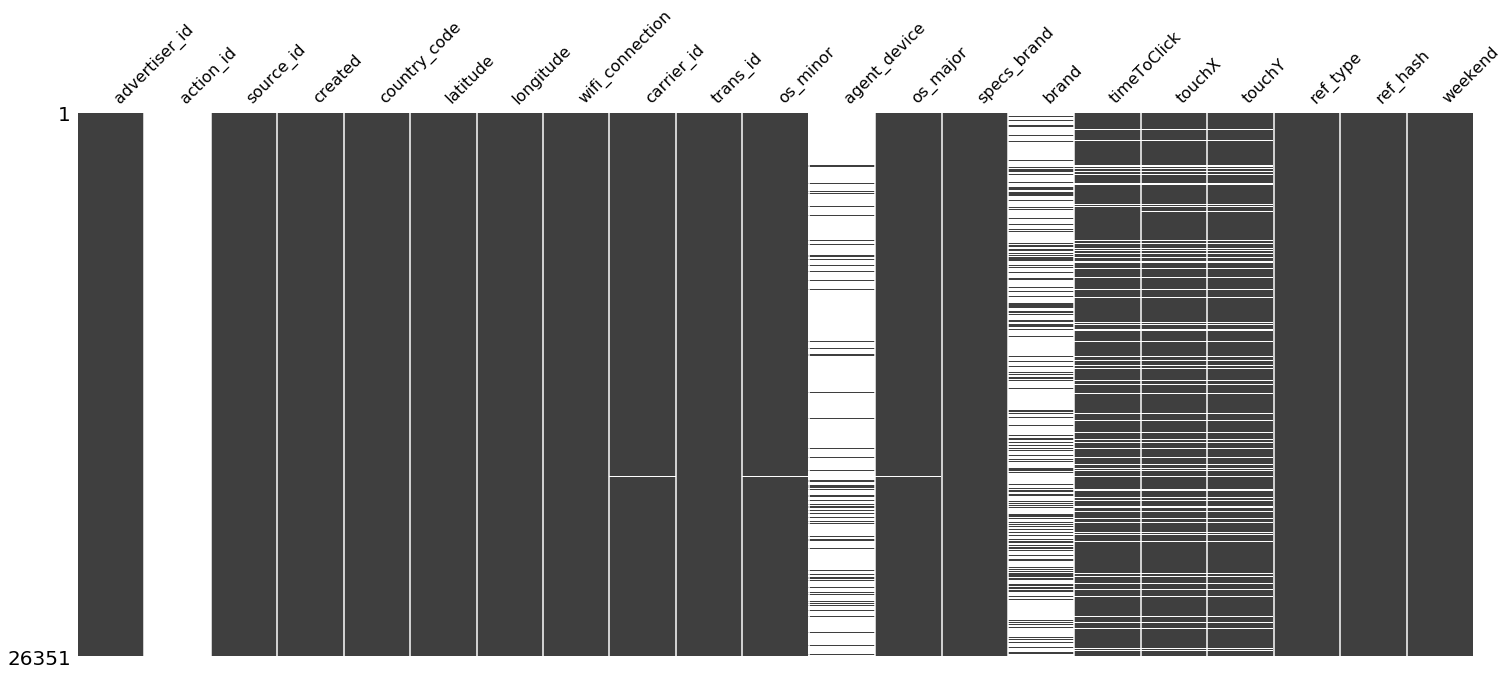

In [9]:
missingno.matrix(clicks, sparkline=False)
plt.savefig('../assets/clicks_missingno.png', bbox_inches='tight')